In [10]:
using Pkg
Pkg.activate("../.")
using Revise
using NotebookToLatex
using JSON

  Activating environment at `~/MEGA/EMAp/NotebookToLatex.jl/Project.toml`


In [11]:
notebook = read("jupyternotebook.ipynb", String);

In [13]:
jsonnb = JSON.parse(notebook)

Dict{String, Any} with 4 entries:
  "cells"          => Any[Dict{String, Any}("cell_type"=>"markdown", "source"=>…
  "nbformat_minor" => 5
  "metadata"       => Dict{String, Any}("language_info"=>Dict{String, Any}("fil…
  "nbformat"       => 4

In [43]:
for cell in jsonnb["cells"]
    if cell["celltype"] == "markdown"
end

"markdown"

In [44]:
basename("./jupyternotebook.ipynb")

"jupyternotebook.ipynb"

In [ ]:
function jupytertolatex(notebook, targetdir="./build_latex"; template=:book, fontpath=nothing)

    createproject(targetdir, template)
    
    notebookname = basename(notebook)
    jsonnb = JSON.parse(read(notebook, String))
    texfile = read(targetdir*"/main.tex", String)
    lineinsert = 1
    for (i,line) in enumerate(split(texfile, "\n"))
        if startswith(line, "% INCLUDE NOTEBOOKS")
            lineinsert = i
            break
        end
    end
    
    if !occursin("\\include{./notebooks/"*notebookname*"}",read(targetdir*"/main.tex", String))

        insertlinebelow(targetdir*"/main.tex",
            "\\include{./notebooks/"*notebookname*"}", lineinsert)
    end

    outputs = collectoutputs(nb,targetdir);
    notebook = targetdir*"/notebooks/"*notebookname*".tex"
    open(notebook, "w") do f
        write(f,"\\newpage\n")
        for i in nb[:order]
            if nb[:celltype][i] == "markdown"
                parsed = markdowntolatex(strip(nb[:contents][i])[7:end-3])
                write(f,parsed)
            elseif nb[:celltype][i] == "code" && nb[:view][i] == "showcode"
                write(f,"\n\\begin{lstlisting}[language=JuliaLocal, style=julia]\n")
                write(f, strip(nb[:contents][i]))
                write(f,"\n\\end{lstlisting}\n")
            end
            if nb[:celltype][i] == "code" && nb[:outputtag][i] == "showoutput"
                if outputs[i][1] == :text
                    write(f,"\n\\begin{verbatim}\n")
                    write(f, outputs[i][2])
                    write(f,"\n\\end{verbatim}\n")
                elseif outputs[i][1] == :plot
                    write(f,"\n\\begin{figure}[H]\n")
                    write(f,"\t\\centering\n")
                    write(f,"\t\\includegraphics[width=0.8\\textwidth]{./figures/"*outputs[i][2]*"}\n")
                    write(f,"\t\\label{fig:"*outputs[i][2]*"}\n")
                    write(f,"\n\\end{figure}\n")
                elseif outputs[i][1] == :image
                    write(f,"\n\\begin{figure}[H]\n")
                    write(f,"\t\\centering\n")
                    write(f,"\t\\includegraphics[width=0.8\\textwidth]{"*outputs[i][2]*"}\n")
                    write(f,"\t\\label{fig:"*outputs[i][2]*"}\n")
                    write(f,"\n\\end{figure}\n")
                end
            end
        end
    end
end

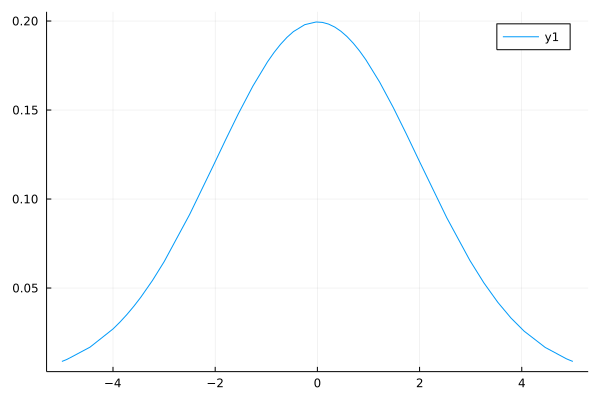

In [40]:
# for cell in jsonnb["cells"]
#     println(cell)
# end
svg = join(jsonnb["cells"][6]["outputs"][1]["data"]["image/svg+xml"])
display(MIME("image/svg+xml"), svg)